In [ ]:
%pip install matplotlib
%pip install phasespace

In [1]:
import phasespace as phsp
import numpy as np
m0 = 5000
m1 = 200
m2 = 1000
m3 = 998
m4 = 400
m5 = 123

# arbitrary masses, since it does not really matter, if the particles do exist or not
# Also I couldnt remermber masses for particles, so here we go

weights, p = phsp.nbody_decay(m0, [m1, m2, m3, m4, m5]).generate(200_000)


global_momenta = {
    i + 1: np.array(p[f"p_{i}"])
        for i in range(5)
}

2024-06-04 12:48:44.321861: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-04 12:48:44.322100: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-04 12:48:44.324609: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-04 12:48:44.352288: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-04 12:48:44.972387: W tensorflow/compiler/tf2tensorrt/utils/py_uti

In [2]:
import numpy as np
from decayangle.lorentz import LorentzTrafo
from decayangle.decay_topology import Topology, TopologyCollection
from decayangle.config import config as cfg
import matplotlib.pyplot as plt


topology = Topology(root=0, decay_topology=(((2,(4, 5)),1),3))
reference = Topology(root=0, decay_topology=(((3,(2, 5)),1),4))

tc = TopologyCollection(0, [1,2,3,4,5])
print(topology)
print(reference)

topology = tc.filter((1,2), (4,3))[0]

result = reference.relative_wigner_angles(topology, global_momenta)[2]


Topology: ( 0 -> ( (1, 2, 4, 5) -> ( (2, 4, 5) -> ( (4, 5) -> 4, 5 ), 2 ), 1 ), 3 )
Topology: ( 0 -> ( (1, 2, 3, 5) -> ( (2, 3, 5) -> ( (2, 5) -> 2, 5 ), 3 ), 1 ), 4 )


Text(0, 0.5, '$\\phi_{\\text{rf}}$')

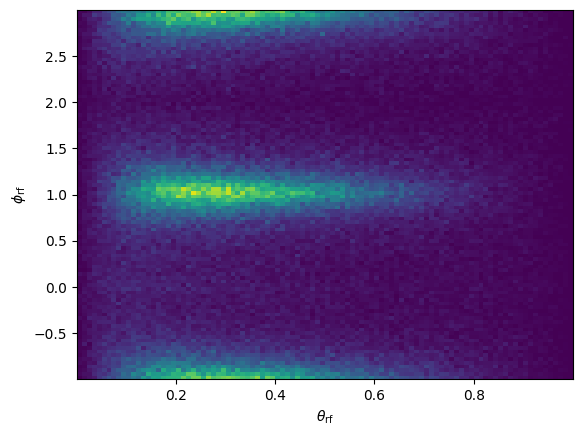

In [3]:
plt.hist2d(result.theta_rf/np.pi, result.phi_rf/np.pi, bins=100, weights=weights)
plt.xlabel(r"$\theta_{\text{rf}}$")
plt.ylabel(r"$\phi_{\text{rf}}$")

Text(0, 0.5, '$\\phi_{\\text{rf}}$')

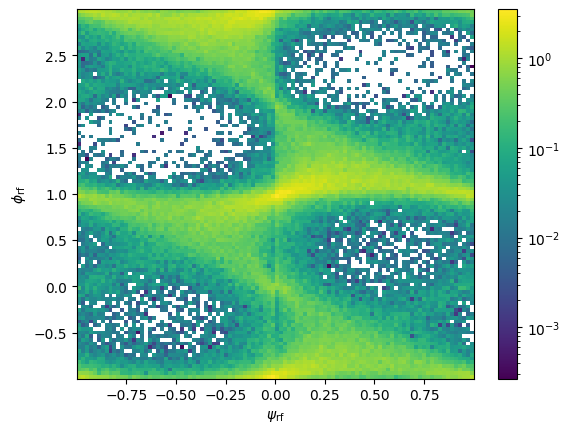

In [4]:
from matplotlib.colors import LogNorm
plt.hist2d(result.psi_rf/np.pi, result.phi_rf/np.pi, bins=100, weights=weights, norm=LogNorm())
plt.colorbar()
plt.xlabel(r"$\psi_{\text{rf}}$")
plt.ylabel(r"$\phi_{\text{rf}}$")